In [7]:
import pandas as pd
import os

# Load data
FILE = "data_files/credit_risk_with_targets_cleaned_final.csv"
df = pd.read_csv(FILE)

# Step 1: Fill missing values
df["Saving accounts"].fillna("unknown", inplace=True)
df["Checking account"].fillna("unknown", inplace=True)

# Step 2: Extract features and labels (No description)
X = df[["Age", "Sex", "Job", "Housing", "Saving accounts", "Checking account", "Credit amount", "Duration", "Purpose"]]
y = df["target"].map({"good risk": 1, "bad risk": 0})  # Binary label

/var/folders/rh/yvrpkh0j1sz5_xlbzsnz53000000gn/T/ipykernel_44864/1832192336.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Saving accounts"].fillna("unknown", inplace=True)
/var/folders/rh/yvrpkh0j1sz5_xlbzsnz53000000gn/T/ipykernel_44864/1832192336.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting value

In [3]:
for col in X.columns:
    print(f"🔍 Distribución de 'target' según la columna: {col}")
    print(df.groupby(col)["target"].value_counts(normalize=True))
    print("="*50)

🔍 Distribución de 'target' según la columna: Age
Age  target   
19   bad risk     0.500000
     good risk    0.500000
20   good risk    0.571429
     bad risk     0.428571
21   bad risk     0.642857
                    ...   
70   bad risk     1.000000
74   bad risk     0.750000
     good risk    0.250000
75   bad risk     0.500000
     good risk    0.500000
Name: proportion, Length: 100, dtype: float64
🔍 Distribución de 'target' según la columna: Sex
Sex     target   
female  good risk    0.806452
        bad risk     0.193548
male    good risk    0.752174
        bad risk     0.247826
Name: proportion, dtype: float64
🔍 Distribución de 'target' según la columna: Job
Job  target   
0    bad risk     0.772727
     good risk    0.227273
1    good risk    0.790000
     bad risk     0.210000
2    good risk    0.780952
     bad risk     0.219048
3    good risk    0.770270
     bad risk     0.229730
Name: proportion, dtype: float64
🔍 Distribución de 'target' según la columna: Housing
Housing

## Check balance for training data for sagemaker

In [10]:
FILE = "data_files/credit_risk_with_targets_cleaned_final.csv"
import pandas as pd

df = pd.read_csv("data_files/credit_risk_with_targets_cleaned_final.csv")

# Inspect distributions of target per feature value
for col in df.columns:
    if col != "target":
        print("="*50)
        print(f"{col}:")
        display(
            df.groupby([col, "target"]).size().groupby(level=0).apply(lambda x: x / x.sum())
        )

Age:


Age  Age  target   
19   19   bad risk     0.500000
          good risk    0.500000
20   20   bad risk     0.428571
          good risk    0.571429
21   21   bad risk     0.642857
                         ...   
70   70   bad risk     1.000000
74   74   bad risk     0.750000
          good risk    0.250000
75   75   bad risk     0.500000
          good risk    0.500000
Length: 100, dtype: float64

Sex:


Sex     Sex     target   
female  female  bad risk     0.193548
                good risk    0.806452
male    male    bad risk     0.247826
                good risk    0.752174
dtype: float64

Job:


Job  Job  target   
0    0    bad risk     0.772727
          good risk    0.227273
1    1    bad risk     0.210000
          good risk    0.790000
2    2    bad risk     0.219048
          good risk    0.780952
3    3    bad risk     0.229730
          good risk    0.770270
dtype: float64

Housing:


Housing  Housing  target   
free     free     bad risk     0.398148
                  good risk    0.601852
own      own      bad risk     0.171108
                  good risk    0.828892
rent     rent     bad risk     0.368715
                  good risk    0.631285
dtype: float64

Saving accounts:


Saving accounts  Saving accounts  target   
little           little           bad risk     0.325041
                                  good risk    0.674959
moderate         moderate         bad risk     0.038835
                                  good risk    0.961165
quite rich       quite rich       bad risk     0.047619
                                  good risk    0.952381
rich             rich             good risk    1.000000
dtype: float64

Checking account:


Checking account  Checking account  target   
little            little            bad risk     0.383212
                                    good risk    0.616788
moderate          moderate          bad risk     0.141264
                                    good risk    0.858736
rich              rich              bad risk     0.031746
                                    good risk    0.968254
dtype: float64

Credit amount:


Credit amount  Credit amount  target   
250            250            good risk    1.0
276            276            good risk    1.0
338            338            good risk    1.0
339            339            good risk    1.0
343            343            good risk    1.0
                                          ... 
15653          15653          bad risk     1.0
15672          15672          good risk    1.0
15857          15857          good risk    1.0
15945          15945          bad risk     1.0
18424          18424          good risk    1.0
Length: 957, dtype: float64

Duration:


Duration  Duration  target   
4         4         bad risk     0.333333
                    good risk    0.666667
5         5         bad risk     1.000000
6         6         bad risk     0.173333
                    good risk    0.826667
7         7         bad risk     0.200000
                    good risk    0.800000
8         8         bad risk     0.285714
                    good risk    0.714286
9         9         bad risk     0.244898
                    good risk    0.755102
10        10        bad risk     0.285714
                    good risk    0.714286
11        11        bad risk     0.222222
                    good risk    0.777778
12        12        bad risk     0.234637
                    good risk    0.765363
13        13        good risk    1.000000
14        14        bad risk     0.500000
                    good risk    0.500000
15        15        bad risk     0.187500
                    good risk    0.812500
16        16        bad risk     1.000000
18  

Purpose:


Purpose              Purpose              target   
business             business             bad risk     0.237113
                                          good risk    0.762887
car                  car                  bad risk     0.219585
                                          good risk    0.780415
domestic appliances  domestic appliances  bad risk     0.250000
                                          good risk    0.750000
education            education            bad risk     0.237288
                                          good risk    0.762712
furniture/equipment  furniture/equipment  bad risk     0.220994
                                          good risk    0.779006
radio/TV             radio/TV             bad risk     0.250000
                                          good risk    0.750000
repairs              repairs              bad risk     0.136364
                                          good risk    0.863636
vacation/others      vacation/others      bad risk  

description:


description                                                                                                                                                                                                                                description                                                                                                                                                                                                                                target   
After carefully reviewing her financial profile, I cannot recommend approval due to her lack of employment and minimal savings, which present significant credit risk.                                                                     After carefully reviewing her financial profile, I cannot recommend approval due to her lack of employment and minimal savings, which present significant credit risk.                                                                     bad risk     1.0
After carefully reviewing her fin

## Binning Credit Amount (4 quantiles): Plot the quantiles

In [5]:
# Bin into 4 quantiles
df["credit_amount_bin"] = pd.qcut(df["Credit amount"], q=4, labels=["Low", "Mid-Low", "Mid-High", "High"])

# Show actual bin intervals
bin_ranges = pd.qcut(df["Credit amount"], q=4).unique().sort_values()
print("📦 Ranges for each quantile bin:")
for i, r in enumerate(bin_ranges):
    print(f"{['Low', 'Mid-Low', 'Mid-High', 'High'][i]}: {r}")

# Average credit amount per bin
print("\n📊 Average credit amount per bin:")
print(df.groupby("credit_amount_bin")["Credit amount"].mean())

# Distribution of 'target' per bin
print("\n📉 Target distribution per bin:")
print(df.groupby("credit_amount_bin")["target"].value_counts(normalize=True).rename("proportion"))

📦 Ranges for each quantile bin:
Low: (249.999, 1365.5]
Mid-Low: (1365.5, 2319.5]
Mid-High: (2319.5, 3972.25]
High: (3972.25, 18424.0]

📊 Average credit amount per bin:
credit_amount_bin
Low          989.160
Mid-Low     1788.812
Mid-High    3069.220
High        7237.840
Name: Credit amount, dtype: float64

📉 Target distribution per bin:
credit_amount_bin  target   
Low                good risk    0.772
                   bad risk     0.228
Mid-Low            good risk    0.736
                   bad risk     0.264
Mid-High           good risk    0.808
                   bad risk     0.192
High               good risk    0.760
                   bad risk     0.240
Name: proportion, dtype: float64


/var/folders/rh/yvrpkh0j1sz5_xlbzsnz53000000gn/T/ipykernel_44864/3779589675.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby("credit_amount_bin")["Credit amount"].mean())
/var/folders/rh/yvrpkh0j1sz5_xlbzsnz53000000gn/T/ipykernel_44864/3779589675.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby("credit_amount_bin")["target"].value_counts(normalize=True).rename("proportion"))


## Plot confusion matrix Log Reg v1

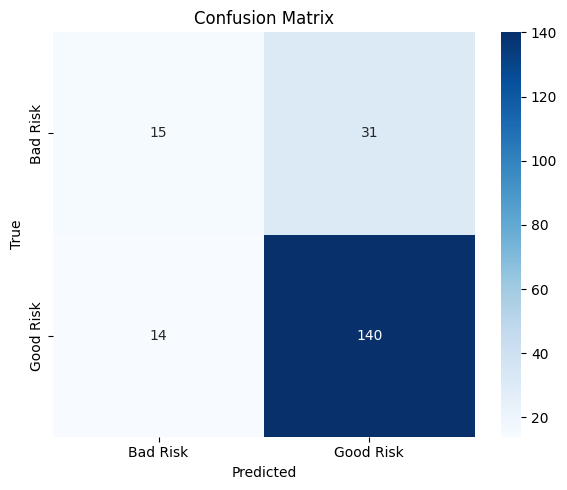

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Load predictions
df = pd.read_csv("downloaded_artifacts/predictions.csv")
y_true = df["y_true"]
y_pred = df["y_pred"]

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)
labels = ["Bad Risk", "Good Risk"]

# Plot
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()

## Plot ROC Curve Log Reg v1

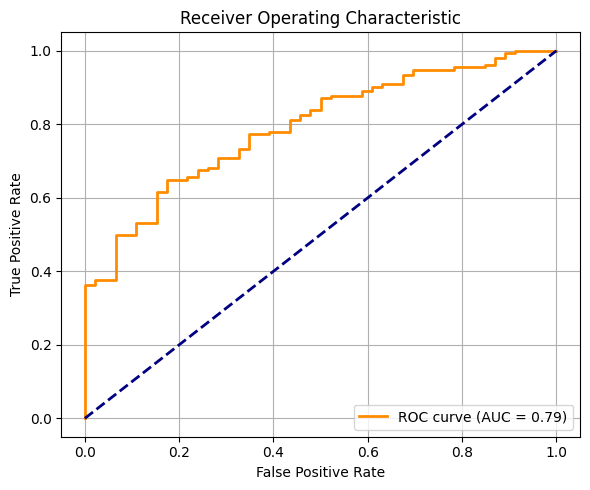

In [17]:
from sklearn.metrics import roc_curve, auc

y_prob = df["y_prob"]
fpr, tpr, _ = roc_curve(y_true, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

## Plot confusion matrix Log Reg v2

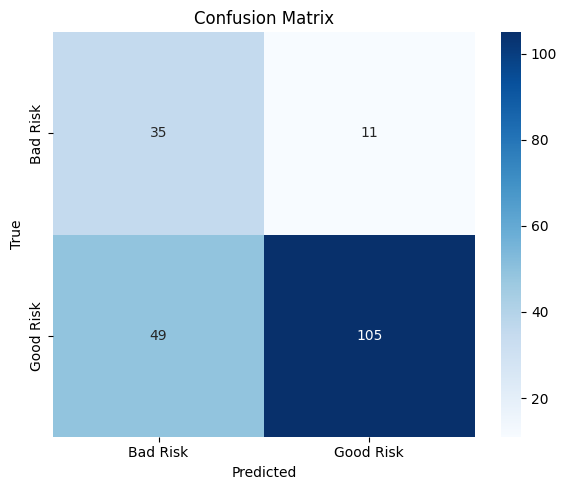

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Load predictions
df = pd.read_csv("downloaded_artifacts/predictions.csv")
y_true = df["y_true"]
y_pred = df["y_pred"]

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)
labels = ["Bad Risk", "Good Risk"]

# Plot
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()

## Plot ROC Curve Log Reg v2

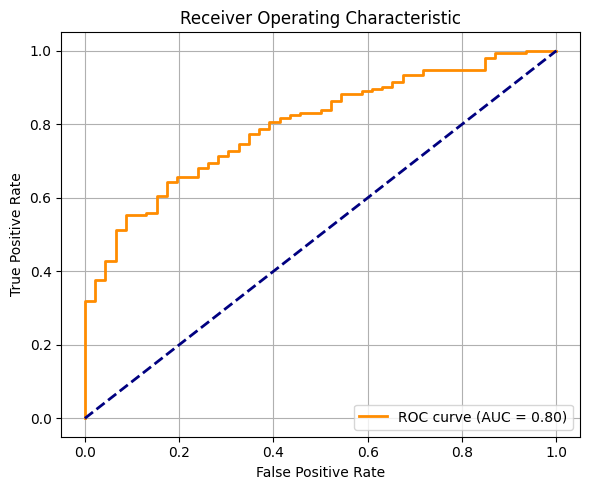

In [19]:
from sklearn.metrics import roc_curve, auc

y_prob = df["y_prob"]
fpr, tpr, _ = roc_curve(y_true, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()